In [1]:
from sklearn.datasets import load_iris
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.functional as F
import torchvision

In [2]:
batch_size_train = 64
batch_size_test = 64

In [3]:
# Load mnist data
# Perform normalization 
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])))
  
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])))
  

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [25]:
# Load training and test datasets into corresponding X and Y variables
X_train, Y_train = train_loader.dataset.data, train_loader.dataset.targets
X_test, Y_test = test_loader.dataset.data, train_loader.dataset.targets

In [26]:
# Reshape data to the format N x D.
# In this case N is number of images in the train (60000) and test (10000) and D is 28 x 28 i.e 784
X_train = X_train.view(-1, 28 * 28)
X_test = X_test.view (-1, 28 * 28)

In [27]:
X_train = X_train.type(torch.FloatTensor)
X_test = X_train.type(torch.FloatTensor)

In [28]:
# Ensure that X tensors are reshaped correctly
print(X_train.shape)
print(X_test.shape)

torch.Size([60000, 784])
torch.Size([60000, 784])


In [40]:
# Check whether gpu is available 
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [48]:
# Move tensors to appropriate devices
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

In [44]:
# Define the model
# As we are using CrossEntropyLoss, we do not require sof
model = nn.Sequential(
          nn.Linear(784, 128),
          nn.Linear(128, 256),
          nn.Linear(256,512),
          nn.Linear(512,256),
          nn.Linear(256,128),
          nn.Linear(128,64),
          nn.Linear(64,32),
          nn.Linear(32, 10)
        )

In [45]:
# Move model to device
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=512, bias=True)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): Linear(in_features=128, out_features=64, bias=True)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): Linear(in_features=32, out_features=10, bias=True)
)

In [46]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)

In [50]:
n_epochs = 1000
train_losses = []
test_losses = []
accuracy = []

for epoch in range(n_epochs):
  optimizer.zero_grad()

  # Perform forward propagation
  output = model(X_train)
  train_loss = criterion(output, Y_train)
  
  # Measure test loss
  output_test = model(X_test)
  test_loss = criterion(output_test, Y_test)

  # Perform backward propagation and update parameters
  train_loss.backward()
  optimizer.step()
  
  if (epoch+1)%50 == 0:
    pred = torch.argmax(output, dim = 1)
    correct = pred.eq(Y_train)
    acc = torch.mean(correct.float())
    accuracy.append(acc)
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    print(f' Epoch: {epoch+1}/{n_epochs} train_loss: {train_loss.item():.2f} test_loss: {test_loss.item():.2f} traing_accuracy: {acc:.2f}')


 Epoch: 50/1000 train_loss: 0.46 test_loss: 0.46 traing_accuracy: 0.87
 Epoch: 100/1000 train_loss: 0.31 test_loss: 0.31 traing_accuracy: 0.91
 Epoch: 150/1000 train_loss: 0.28 test_loss: 0.28 traing_accuracy: 0.92
 Epoch: 200/1000 train_loss: 0.27 test_loss: 0.27 traing_accuracy: 0.92
 Epoch: 250/1000 train_loss: 0.26 test_loss: 0.26 traing_accuracy: 0.93
 Epoch: 300/1000 train_loss: 0.26 test_loss: 0.26 traing_accuracy: 0.93
 Epoch: 350/1000 train_loss: 0.25 test_loss: 0.25 traing_accuracy: 0.93
 Epoch: 400/1000 train_loss: 0.24 test_loss: 0.24 traing_accuracy: 0.93
 Epoch: 450/1000 train_loss: 1.96 test_loss: 1.96 traing_accuracy: 0.64
 Epoch: 500/1000 train_loss: 0.27 test_loss: 0.27 traing_accuracy: 0.93
 Epoch: 550/1000 train_loss: 0.25 test_loss: 0.25 traing_accuracy: 0.93
 Epoch: 600/1000 train_loss: 0.24 test_loss: 0.24 traing_accuracy: 0.93
 Epoch: 650/1000 train_loss: 0.24 test_loss: 0.24 traing_accuracy: 0.93
 Epoch: 700/1000 train_loss: 0.23 test_loss: 0.23 traing_accuracy

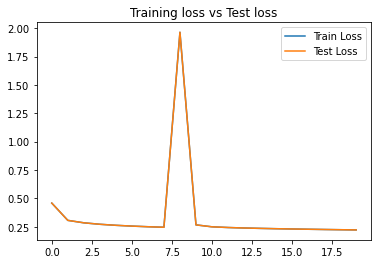

In [51]:
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.title('Training loss vs Test loss')
plt.show()

In [52]:
test_accuracy = []
model.eval()
with torch.no_grad():
  test_output = model(X_test)
  test_pred = torch.argmax(test_output, dim = 1)
  correct = test_pred.eq(Y_test)
  test_acc = torch.mean(correct.float())
print(f'Validation data accuracy: {test_acc:.2f}')

Validation data accuracy: 0.94
